<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.776455,40.226952,34.720219,29.317357,-372.504165,-237.463182,105.171428,-342.634610
1,0.0,1.0,70.169782,68.137869,77.713304,45.551841,-294.907404,-23.334607,330.131539,-353.466146
2,0.0,2.0,65.482262,43.567037,62.144234,25.315202,-91.117637,115.391097,263.725198,-148.334101
3,0.0,3.0,41.206522,95.869191,77.660575,24.339250,-136.656973,112.418564,328.967848,-216.549283
4,0.0,4.0,70.031890,36.445494,48.750481,82.008294,166.653090,413.889250,212.749544,201.139706
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.976467,94.155596,66.933698,24.877092,-156.658343,110.284510,627.770493,-517.485983
249996,999.0,246.0,62.326640,22.513841,51.930267,31.881258,150.070884,328.722890,148.248752,180.474138
249997,999.0,247.0,39.944178,55.249815,41.361395,54.415196,-445.317426,-244.346842,300.893527,-545.240369
249998,999.0,248.0,23.000951,96.272921,68.202808,89.984361,-1601.177815,-1313.716774,400.562098,-1714.278872


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    20.776455  40.226952  34.720219  29.317357  -372.504165   
      1.0    70.169782  68.137869  77.713304  45.551841  -294.907404   
      2.0    65.482262  43.567037  62.144234  25.315202   -91.117637   
      3.0    41.206522  95.869191  77.660575  24.339250  -136.656973   
      4.0    70.031890  36.445494  48.750481  82.008294   166.653090   
...                ...        ...        ...        ...          ...   
999.0 245.0  70.976467  94.155596  66.933698  24.877092  -156.658343   
      246.0  62.326640  22.513841  51.930267  31.881258   150.070884   
      247.0  39.944178  55.249815  41.361395  54.415196  -445.317426   
      248.0  23.000951  96.272921  68.202808  89.984361 -1601.177815   
      249.0  38.682388  38.255445  83.418053  20.449620   123.341394   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -237.463182  105.171428  -342.634610  
      1.0     -23.334607  330.131539  -353.466146  
      2.0     115.391097  263.725198  -148.334101  
      3.0     112.418564  328.967848  -216.549283  
      4.0     413.889250  212.749544   201.139706  
...                  ...         ...          ...  
999.0 245.0   110.284510  627.770493  -517.485983  
      246.0   328.722890  148.248752   180.474138  
      247.0  -244.346842  300.893527  -545.240369  
      248.0 -1313.716774  400.562098 -1714.278872  
      249.0   314.146901  101.676344   212.470557  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    20.776455  40.226952  34.720219  29.317357  -372.504165   
      1.0    70.169782  68.137869  77.713304  45.551841  -294.907404   
      2.0    65.482262  43.567037  62.144234  25.315202   -91.117637   
      3.0    41.206522  95.869191  77.660575  24.339250  -136.656973   
      4.0    70.031890  36.445494  48.750481  82.008294   166.653090   
...                ...        ...        ...        ...          ...   
999.0 245.0  70.976467  94.155596  66.933698  24.877092  -156.658343   
      246.0  62.326640  22.513841  51.930267  31.881258   150.070884   
      247.0  39.944178  55.249815  41.361395  54.415196  -445.317426   
      248.0  23.000951  96.272921  68.202808  89.984361 -1601.177815   
      249.0  38.682388  38.255445  83.418053  20.449620   123.341394   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -237.463182  105.171428  -342.634610  
      1.0     -23.334607  330.131539  -353.466146  
      2.0     115.391097  263.725198  -148.334101  
      3.0     112.418564  328.967848  -216.549283  
      4.0     413.889250  212.749544   201.139706  
...                  ...         ...          ...  
999.0 245.0   110.284510  627.770493  -517.485983  
      246.0   328.722890  148.248752   180.474138  
      247.0  -244.346842  300.893527  -545.240369  
      248.0 -1313.716774  400.562098 -1714.278872  
      249.0   314.146901  101.676344   212.470557  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.776455,40.226952,34.720219,29.317357,-372.504165,-237.463182,105.171428,-342.634610
1,0.0,1.0,70.169782,68.137869,77.713304,45.551841,-294.907404,-23.334607,330.131539,-353.466146
2,0.0,2.0,65.482262,43.567037,62.144234,25.315202,-91.117637,115.391097,263.725198,-148.334101
3,0.0,3.0,41.206522,95.869191,77.660575,24.339250,-136.656973,112.418564,328.967848,-216.549283
4,0.0,4.0,70.031890,36.445494,48.750481,82.008294,166.653090,413.889250,212.749544,201.139706
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.976467,94.155596,66.933698,24.877092,-156.658343,110.284510,627.770493,-517.485983
249996,999.0,246.0,62.326640,22.513841,51.930267,31.881258,150.070884,328.722890,148.248752,180.474138
249997,999.0,247.0,39.944178,55.249815,41.361395,54.415196,-445.317426,-244.346842,300.893527,-545.240369
249998,999.0,248.0,23.000951,96.272921,68.202808,89.984361,-1601.177815,-1313.716774,400.562098,-1714.278872


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    20.776455  40.226952  34.720219  29.317357  -372.504165   
      1.0    70.169782  68.137869  77.713304  45.551841  -294.907404   
      2.0    65.482262  43.567037  62.144234  25.315202   -91.117637   
      3.0    41.206522  95.869191  77.660575  24.339250  -136.656973   
      4.0    70.031890  36.445494  48.750481  82.008294   166.653090   
...                ...        ...        ...        ...          ...   
999.0 245.0  70.976467  94.155596  66.933698  24.877092  -156.658343   
      246.0  62.326640  22.513841  51.930267  31.881258   150.070884   
      247.0  39.944178  55.249815  41.361395  54.415196  -445.317426   
      248.0  23.000951  96.272921  68.202808  89.984361 -1601.177815   
      249.0  38.682388  38.255445  83.418053  20.449620   123.341394   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -237.463182  105.171428  -342.634610  
      1.0     -23.334607  330.131539  -353.466146  
      2.0     115.391097  263.725198  -148.334101  
      3.0     112.418564  328.967848  -216.549283  
      4.0     413.889250  212.749544   201.139706  
...                  ...         ...          ...  
999.0 245.0   110.284510  627.770493  -517.485983  
      246.0   328.722890  148.248752   180.474138  
      247.0  -244.346842  300.893527  -545.240369  
      248.0 -1313.716774  400.562098 -1714.278872  
      249.0   314.146901  101.676344   212.470557  

[250000 rows x 8 columns]

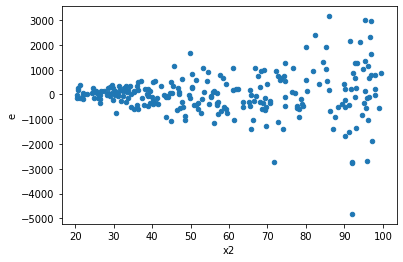

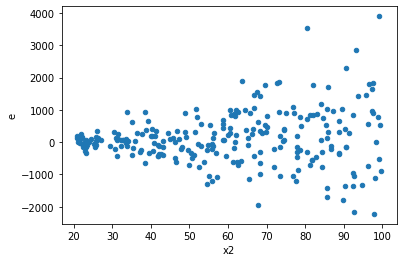

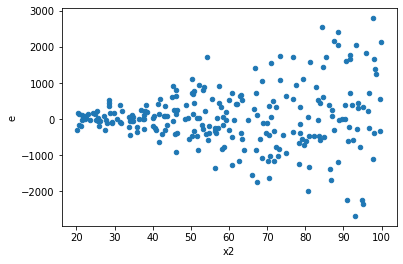

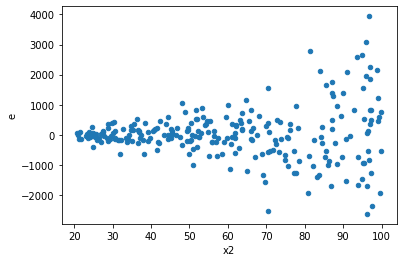

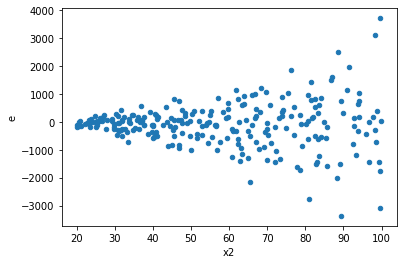

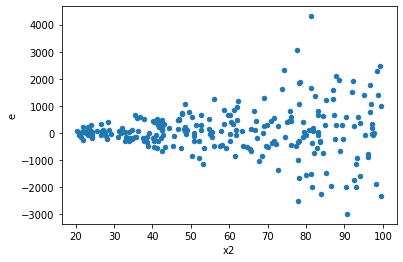

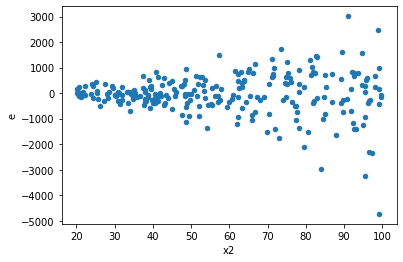

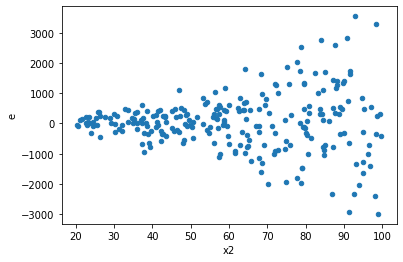

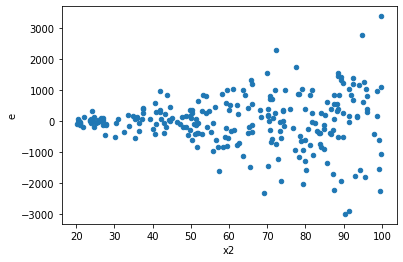

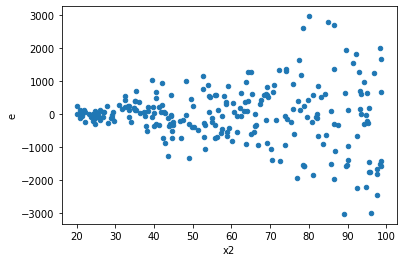

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,124.0,118.0,21074055.14925227,169889856.3573325,169952.05765526023,1439744.545401123,8.471474633873378,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,116.0,126.0,67758846.07772887,84751365.37605679,584127.9834286971,672629.8839369586,1.1515111465620524,0.43740063265656737,0.7812996836717163,0.21870031632828368,Reject001=1 : Homoscedasticity
3.0,132.0,110.0,83324784.43995516,99106379.59850244,631248.3669693572,900967.0872591131,1.427278286017093,0.05439244005342836,0.9728037799732858,0.02719622002671418,Reject001=1 : Homoscedasticity
4.0,118.0,124.0,57653252.132493325,94595312.59136325,488586.882478757,762865.4241238972,1.561371071310056,0.014656375582742243,0.9926718122086289,0.007328187791371121,Reject001=1 : Homoscedasticity
5.0,129.0,113.0,87302237.15463954,93652424.08828504,676761.5283305391,828782.5140556198,1.2246300644483912,0.2703092006937806,0.8648453996531097,0.1351546003468903,Reject001=1 : Homoscedasticity
6.0,127.0,115.0,83446150.03187552,77328079.07240196,657056.2994635868,672418.0788904518,1.0233797003991991,0.9015913793414989,0.5492043103292505,0.45079568967074946,Reject001=1 : Homoscedasticity
8.0,106.0,136.0,23911143.474764656,151444798.2324286,225576.82523362883,1113564.6928855046,4.936520813838881,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,122.0,120.0,73550207.52897355,121015223.81136893,602870.5535161766,1008460.1984280744,1.6727640660940237,0.005017315300353431,0.9974913423498233,0.0025086576501767155,Reject001=0 : Heteroscedasticity
11.0,130.0,112.0,19274286.62625931,170149876.50022596,148263.74327891777,1519195.3258948748,10.246573385355065,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,118.0,21074055.14925227,169889856.3573325,169952.05765526023,1439744.545401123,8.471474633873378,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,116.0,126.0,67758846.07772887,84751365.37605679,584127.9834286971,672629.8839369586,1.1515111465620524,0.43740063265656737,Reject001=1 : Homoscedasticity
2.0,112.0,130.0,85955690.47587055,84134721.70678903,767461.5221059871,647190.1669753003,0.8432867946256761,0.3545044938697517,Reject001=1 : Homoscedasticity
3.0,132.0,110.0,83324784.43995516,99106379.59850244,631248.3669693572,900967.0872591131,1.427278286017093,0.05439244005342836,Reject001=1 : Homoscedasticity
4.0,118.0,124.0,57653252.132493325,94595312.59136325,488586.882478757,762865.4241238972,1.561371071310056,0.014656375582742243,Reject001=1 : Homoscedasticity
5.0,129.0,113.0,87302237.15463954,93652424.08828504,676761.5283305391,828782.5140556198,1.2246300644483912,0.2703092006937806,Reject001=1 : Homoscedasticity
6.0,127.0,115.0,83446150.03187552,77328079.07240196,657056.2994635868,672418.0788904518,1.0233797003991991,0.9015913793414989,Reject001=1 : Homoscedasticity
7.0,125.0,117.0,131340185.37053202,86978998.57770528,1050721.482964256,743410.2442538913,0.7075235981247954,0.05758361503474298,Reject001=1 : Homoscedasticity
8.0,106.0,136.0,23911143.474764656,151444798.2324286,225576.82523362883,1113564.6928855046,4.936520813838881,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      549
Reject001=0 : Heteroscedasticity    451
Name: Result_test, dtype: int64